INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


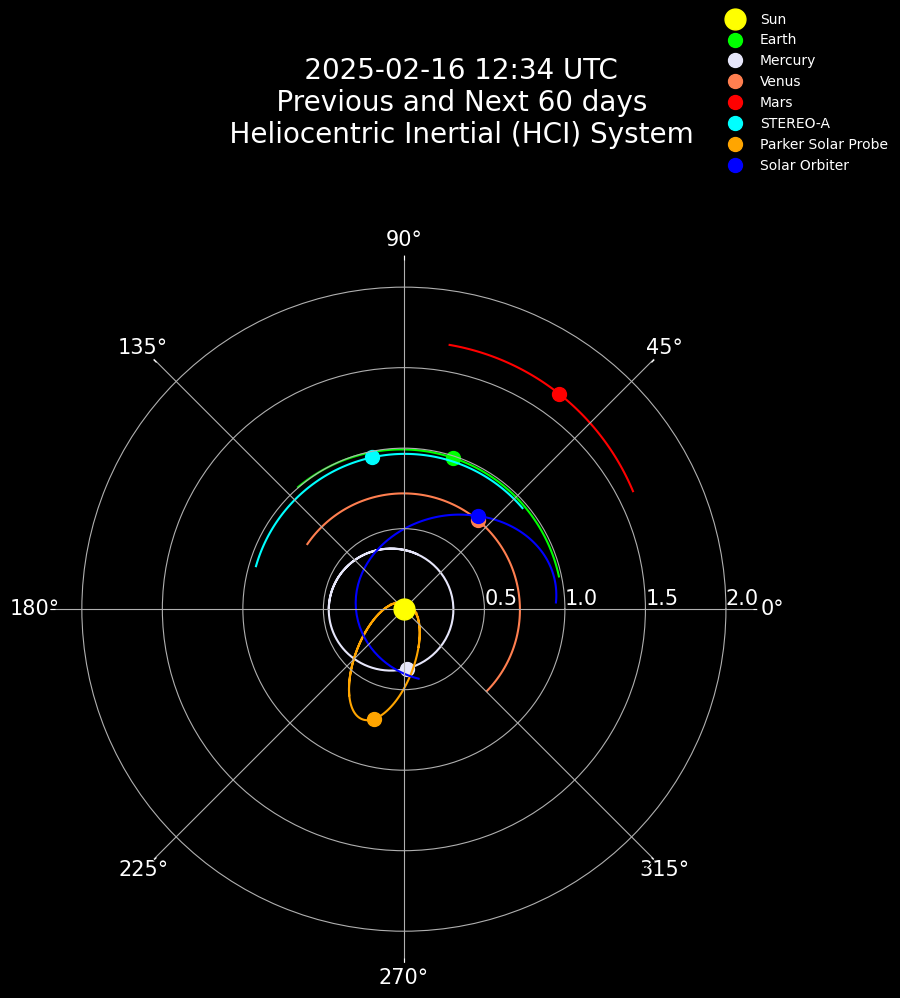

In [ ]:
from sunpy.time import parse_time
from sunpy.coordinates import HeliocentricInertial
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sunpy.coordinates import get_horizons_coord, get_body_heliographic_stonyhurst

class Plotter:
    def __init__(self, obstime, frame, period, direction):
        self.obstime = obstime
        self.frame = frame
        self.period = period
        assert direction in ['forward', 'backward', 'both'], 'direction must be forward, backward or both'
        self.direction = direction
    
    def orbit(self, ax, kind, name, color):
        obstime = self.obstime
        hci_frame = self.frame
        period = self.period
        direction = self.direction

        if kind == 'planet':
            f = get_body_heliographic_stonyhurst
        elif kind == 'mission':
            f = get_horizons_coord
        
        coord = f(name, obstime)
        coord = coord.transform_to(hci_frame)
        ax.plot(coord.lon.to(u.rad), coord.distance, 'o', color=color, label=name, markersize=10, zorder=0)
        if direction == 'forward':
            times = obstime + np.arange(period)*u.day
        if direction == 'backward':
            times = sorted(obstime - np.arange(period)*u.day)
        if direction == 'both':
            forward_times = obstime + np.arange(period)*u.day
            backward_times = sorted(obstime - np.arange(period)*u.day)
            times = np.concatenate([backward_times, forward_times])
            
        coords = f(name, times)
        coords = coords.transform_to(hci_frame)
        ax.plot(coords.lon.to(u.rad), coords.distance, '-', color=color, zorder=0)
        return coord, coords

obstime = parse_time('now')
hci_frame = HeliocentricInertial(obstime=obstime)
period = 60
direction = 'both'
if direction == 'forward':
    title_str = f'Next {period} days'
if direction == 'backward':
    title_str = f'Previous {period} days'
if direction == 'both':
    title_str = f'Previous and Next {period} days'
plotter = Plotter(obstime=obstime, frame=hci_frame, period=period, direction=direction)
earth_align = True

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
#------------------------------------------------------------
fig.patch.set_facecolor('black')  # Set figure background color
ax.set_facecolor('black')  # Set axes background color
ax.xaxis.label.set_color('white')     # Set X-axis label color
ax.yaxis.label.set_color('white')     # Set Y-axis label color
ax.title.set_color('white')           # Set title color
ax.tick_params(axis='x', colors='white', direction='in', top=True)  # X-axis ticks
ax.tick_params(axis='y', colors='white', direction='in', right=True)  # Y-axis ticks
ax.set_rticks([0.5, 1, 1.5, 2])
ax.set_rlim(0, 2.2)
ax.set_rlabel_position(0)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
#==============================================================================
ax.plot(0, 0, 'o', markersize=15, color='yellow', label='Sun', zorder=100)
#------------------------------------------------------------
earth_coord, _ = plotter.orbit(ax, kind='planet', name='Earth', color='lime')
if earth_align:
    ax.set_theta_offset(np.deg2rad(270-earth_coord.lon.to(u.deg).value))
#------------------------------------------------------------
plotter.orbit(ax, kind='planet', name='Mercury', color='lavender')
#------------------------------------------------------------
plotter.orbit(ax, kind='planet', name='Venus', color='coral')
#------------------------------------------------------------
plotter.orbit(ax, kind='planet', name='Mars', color='red')
#==============================================================================
plotter.orbit(ax, kind='mission', name='STEREO-A', color='cyan')
#------------------------------------------------------------
plotter.orbit(ax, kind='mission', name='Parker Solar Probe', color='orange')
#------------------------------------------------------------
plotter.orbit(ax, kind='mission', name='Solar Orbiter', color='blue')
#==============================================================================
fig.legend(facecolor='black', labelcolor='white', frameon=False)
ax.set_title(f""" 
             {obstime.strftime('%Y-%m-%d %H:%M UTC')}
             {title_str}
             Heliocentric Inertial (HCI) System
             """, fontsize=20, y=1.1)
fig.tight_layout()
plt.show()